<a href="https://colab.research.google.com/github/ShriomiGite/NLP/blob/main/LSTM_for_Twitter_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [ ]:
df=pd.read_csv("/content/twitter.csv")
print(df.head())
print(df.shape)

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
(31962, 3)


In [ ]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [ ]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [ ]:
positive=" ".join(df[df['label']==1]['tweet'])
negative=" ".join(df[df['label']==0]['tweet'])

In [ ]:
def Wordcloud(tweet):
  wc=WordCloud(height=800,
               width=800,
               background_color="white",
               min_font_size=10
               )
  wc.generate(tweet)

  plt.figure(figsize=(7,5))
  plt.imshow(wc)
  plt.axis("off")
  plt.show()


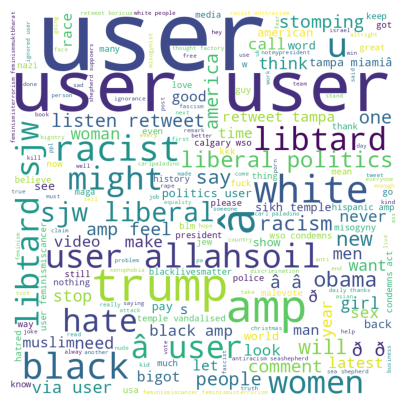

In [ ]:
Wordcloud(positive)

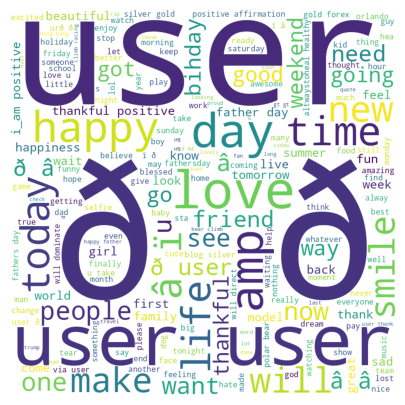

In [ ]:
Wordcloud(negative)

In [ ]:
x=df['tweet']
y=df['label']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

#Tokenizer

In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(x_train)


In [ ]:
vocab=tokenizer.index_word
vocab_length=len(vocab)

#print(vocab)
#print(vocab_length)

In [ ]:
train_seq=tokenizer.texts_to_sequences(x_train)

In [ ]:
doc_length=[]
for doc in train_seq:
  doc_length.append(len(doc))

#print(doc_length)

In [ ]:
max(doc_length)

42

In [ ]:
maxlength=42

In [ ]:
train_matrix=sequence.pad_sequences(train_seq,maxlen=maxlength)

In [ ]:
test_seq=tokenizer.texts_to_sequences(x_test)
test_matrix=sequence.pad_sequences(test_seq,maxlen=maxlength)

#LSTM

In [ ]:

model=Sequential()

model.add(Embedding(input_dim=vocab_length+1,
                    output_dim=50,
                    input_length=maxlength,
                    mask_zero=True
                    ))
model.add(LSTM(64))

model.add(Dense(36,activation="relu"))
model.add(Dense(18,activation="relu"))

model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy")

model.fit(train_matrix,y_train,epochs=10,batch_size=50)

Epoch 1/10
448/448 [==============================] - 34s 62ms/step - loss: 0.1818
Epoch 2/10
448/448 [==============================] - 27s 60ms/step - loss: 0.0571
Epoch 3/10
448/448 [==============================] - 27s 60ms/step - loss: 0.0222
Epoch 4/10
448/448 [==============================] - 27s 61ms/step - loss: 0.0095
Epoch 5/10
448/448 [==============================] - 27s 60ms/step - loss: 0.0052
Epoch 6/10
448/448 [==============================] - 27s 61ms/step - loss: 0.0042
Epoch 7/10
448/448 [==============================] - 28s 61ms/step - loss: 0.0049
Epoch 8/10
448/448 [==============================] - 27s 61ms/step - loss: 0.0028
Epoch 9/10
448/448 [==============================] - 27s 60ms/step - loss: 0.0013
Epoch 10/10
448/448 [==============================] - 27s 60ms/step - loss: 9.9695e-04


In [ ]:
ypred=model.predict(test_matrix)
ypred=np.where(ypred>=0.5, 1, 0)
print(classification_report(y_test,ypred))

300/300 [==============================] - 4s 9ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      8940
           1       0.70      0.60      0.65       649

    accuracy                           0.96      9589
   macro avg       0.84      0.79      0.81      9589
weighted avg       0.95      0.96      0.95      9589



#Bidirectional LSTM

In [ ]:
model=Sequential()

model.add(Embedding(input_dim=vocab_length+1,
                    output_dim=50,
                    input_length=maxlength,
                    mask_zero=True
                    ))
model.add(Bidirectional(LSTM(64)))

model.add(Dense(36,activation="tanh"))
model.add(Dense(18,activation="tanh"))

model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy")

model.fit(train_matrix,y_train,epochs=10,batch_size=50)

Epoch 1/10
448/448 [==============================] - 74s 121ms/step - loss: 0.1845
Epoch 2/10
448/448 [==============================] - 63s 140ms/step - loss: 0.0566
Epoch 3/10
448/448 [==============================] - 49s 110ms/step - loss: 0.0206
Epoch 4/10
448/448 [==============================] - 49s 110ms/step - loss: 0.0083
Epoch 5/10
448/448 [==============================] - 49s 109ms/step - loss: 0.0050
Epoch 6/10
448/448 [==============================] - 50s 111ms/step - loss: 0.0023
Epoch 7/10
448/448 [==============================] - 49s 110ms/step - loss: 0.0017
Epoch 8/10
448/448 [==============================] - 50s 113ms/step - loss: 0.0015
Epoch 9/10
448/448 [==============================] - 48s 108ms/step - loss: 0.0015
Epoch 10/10
448/448 [==============================] - 48s 108ms/step - loss: 0.0028


In [ ]:
ypred=model.predict(test_matrix)
ypred=np.where(ypred>=0.5, 1, 0)
print(classification_report(y_test,ypred))

300/300 [==============================] - 8s 18ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      8940
           1       0.68      0.61      0.64       649

    accuracy                           0.95      9589
   macro avg       0.82      0.80      0.81      9589
weighted avg       0.95      0.95      0.95      9589



#Multilayer LSTM

In [ ]:
model=Sequential()

model.add(Embedding(input_dim=vocab_length+1,
                    output_dim=50,
                    input_length=maxlength,
                    mask_zero=True
                    ))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64))

model.add(Dense(36,activation="tanh"))
model.add(Dense(18,activation="tanh"))

model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy")

model.fit(train_matrix,y_train,epochs=10,batch_size=50)

Epoch 1/10
448/448 [==============================] - 94s 164ms/step - loss: 0.2346
Epoch 2/10
448/448 [==============================] - 75s 167ms/step - loss: 0.0938
Epoch 3/10
448/448 [==============================] - 96s 214ms/step - loss: 0.0366
Epoch 4/10
448/448 [==============================] - 75s 167ms/step - loss: 0.0156
Epoch 5/10
448/448 [==============================] - 75s 168ms/step - loss: 0.0092
Epoch 6/10
448/448 [==============================] - 75s 167ms/step - loss: 0.0059
Epoch 7/10
448/448 [==============================] - 75s 167ms/step - loss: 0.0028
Epoch 8/10
448/448 [==============================] - 74s 165ms/step - loss: 0.0039
Epoch 9/10
448/448 [==============================] - 78s 173ms/step - loss: 0.0035
Epoch 10/10
448/448 [==============================] - 75s 166ms/step - loss: 0.0022


In [ ]:
ypred=model.predict(test_matrix)
ypred=np.where(ypred>=0.5, 1, 0)
print(classification_report(y_test,ypred))

300/300 [==============================] - 14s 34ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8940
           1       0.77      0.59      0.67       649

    accuracy                           0.96      9589
   macro avg       0.87      0.79      0.82      9589
weighted avg       0.96      0.96      0.96      9589



It can be seen that the classification report for LSTM is far better than the other Two models.

Hence LSTM Model is more effective.